## Creating Sample Time Series Data

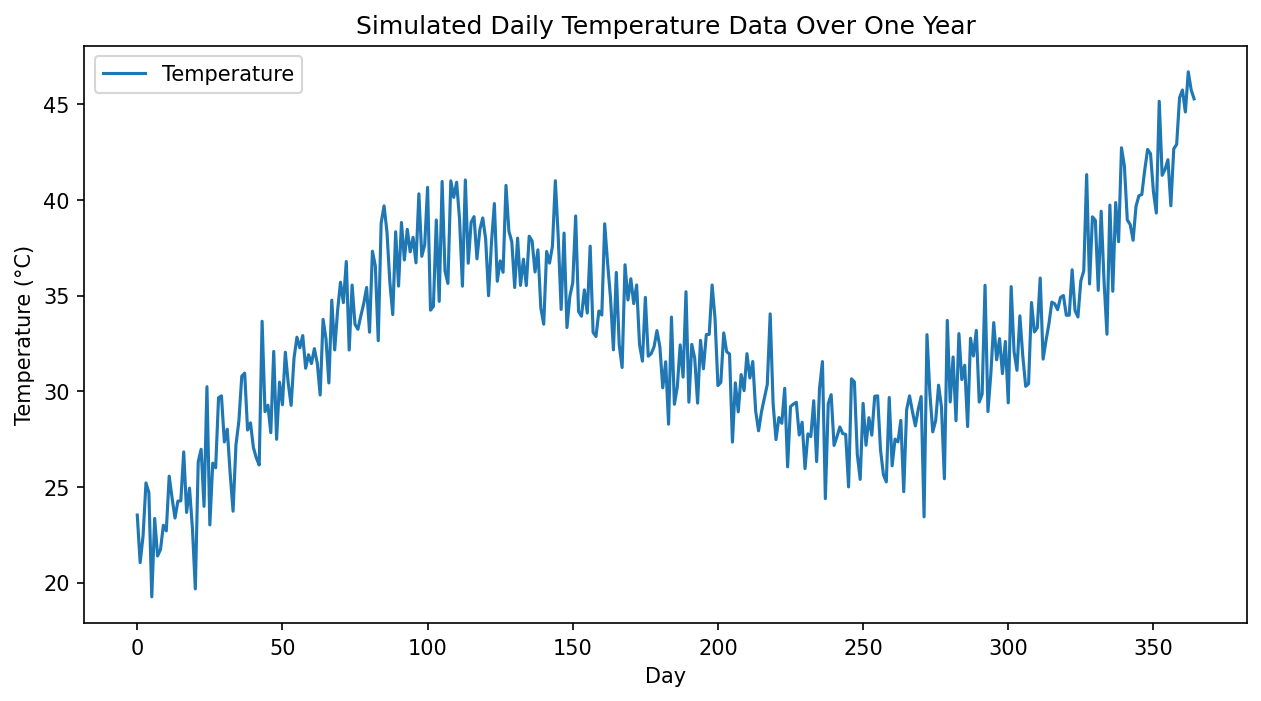

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

# Create daily data points for a year (365 days)
days = np.arange(365)

# Generate a seasonal pattern using a sine wave (mimicking annual temperature cycles)
seasonal = 10 * np.sin(2 * np.pi * days / 365)

# Add random noise to make it more realistic
noise = np.random.normal(0, 2, days.size)

# Simulate a gradual upward trend (e.g., 0.05 degrees increase per day)
trend = 0.07 * days

# Combine all parts to create our final temperature data
temperature_data = 20 + seasonal + trend + noise

# Plot the data
plt.figure(figsize=(10, 5),dpi=150)
plt.plot(days, temperature_data, label="Temperature")
plt.title("Simulated Daily Temperature Data Over One Year")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


## Smoothing the Data with a Moving Average Filter

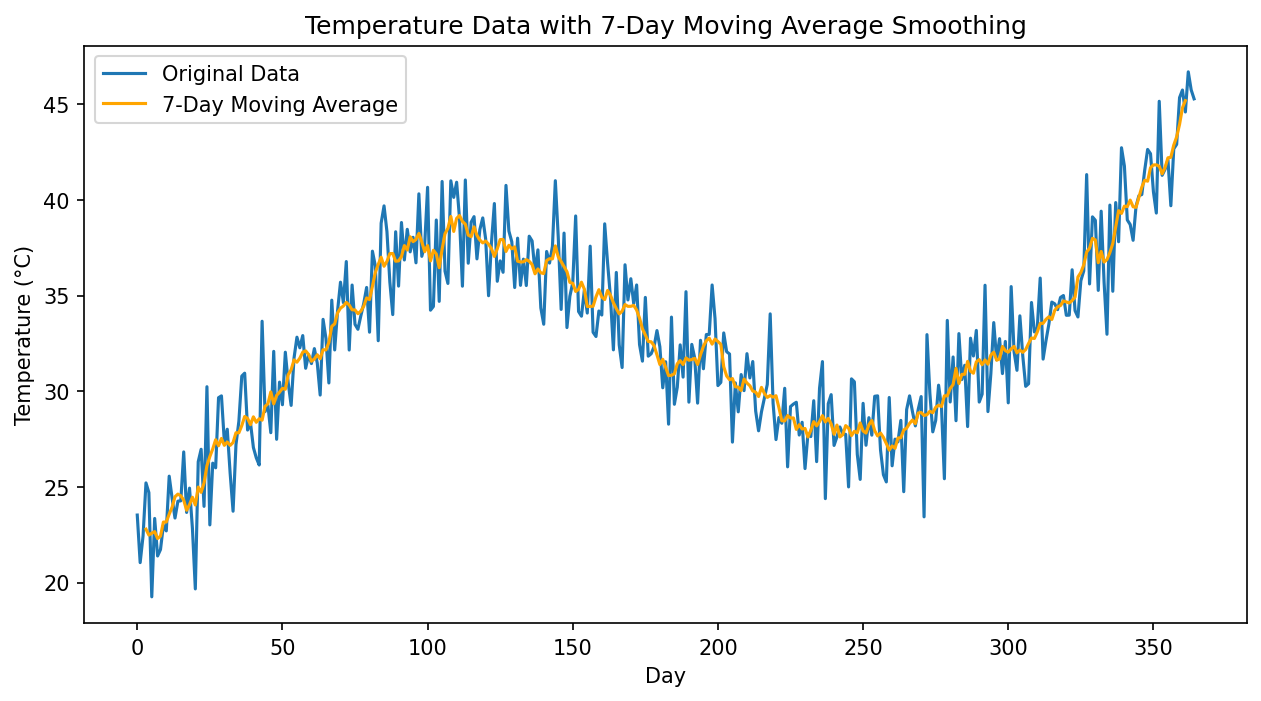

In [16]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Apply the MAF
smoothed_data = moving_average(temperature_data, 7)

# Plot the original vs. smoothed data
plt.figure(figsize=(10, 5),dpi=150)
plt.plot(days, temperature_data, label="Original Data")
plt.plot(days[3:-3], smoothed_data, label="7-Day Moving Average", color="orange")
plt.title("Temperature Data with 7-Day Moving Average Smoothing")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


## Filtering Out the Noise with a Low-Pass Filter

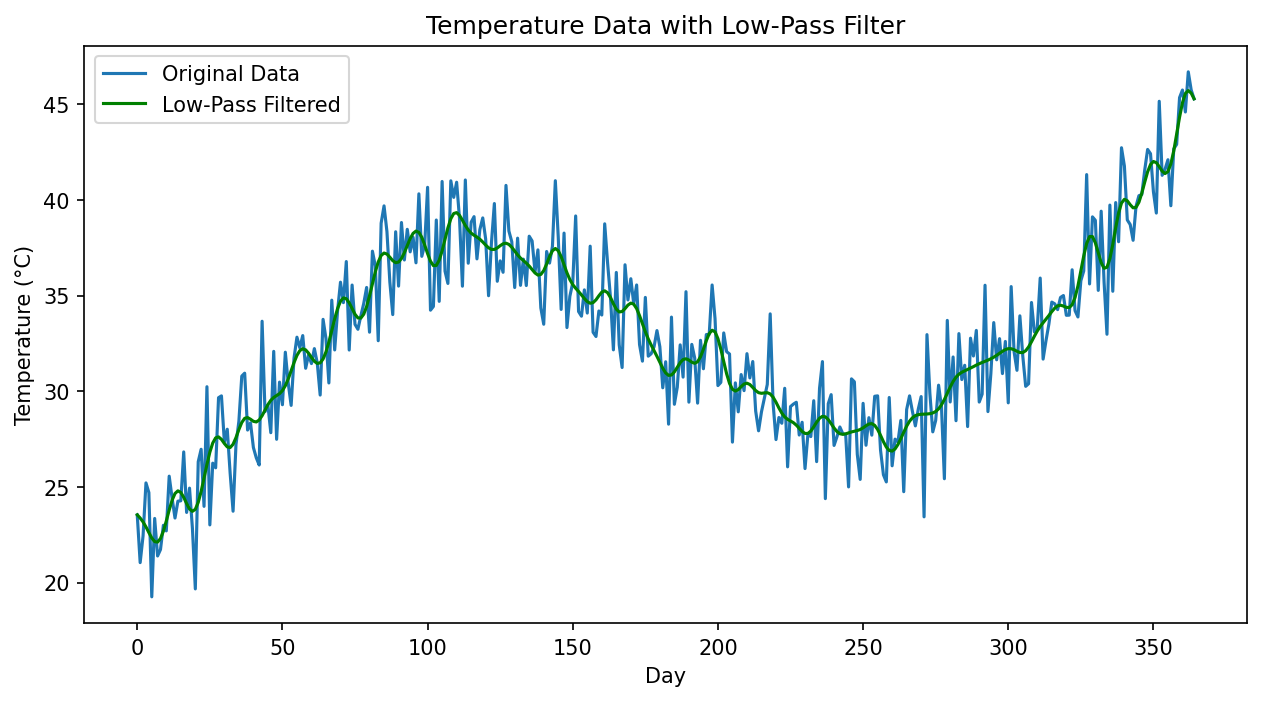

In [17]:
from scipy.signal import butter, filtfilt

def low_pass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# using the low-pass filter
filtered_data = low_pass_filter(temperature_data, cutoff=0.1, fs=1)

plt.figure(figsize=(10, 5),dpi=150)
plt.plot(days, temperature_data, label="Original Data")
plt.plot(days, filtered_data, label="Low-Pass Filtered", color="green")
plt.title("Temperature Data with Low-Pass Filter")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


## Detrending to Isolate Patterns

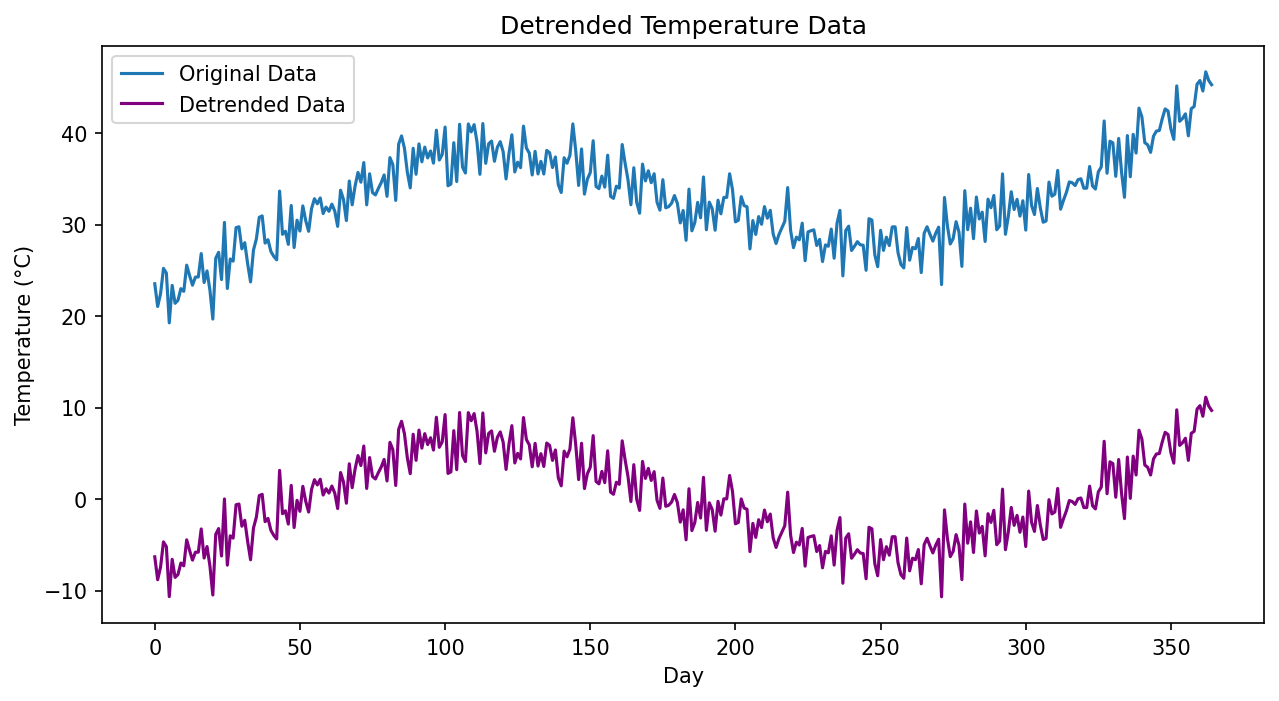

In [18]:
from scipy.signal import detrend

# Remove the trend component
detrended_data = detrend(temperature_data)

# Plot the original vs. detrended data
plt.figure(figsize=(10, 5),dpi=150)
plt.plot(days, temperature_data, label="Original Data")
plt.plot(days, detrended_data, label="Detrended Data", color="purple")
plt.title("Detrended Temperature Data")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


## Performing Spectral Analysis to Identify Patterns

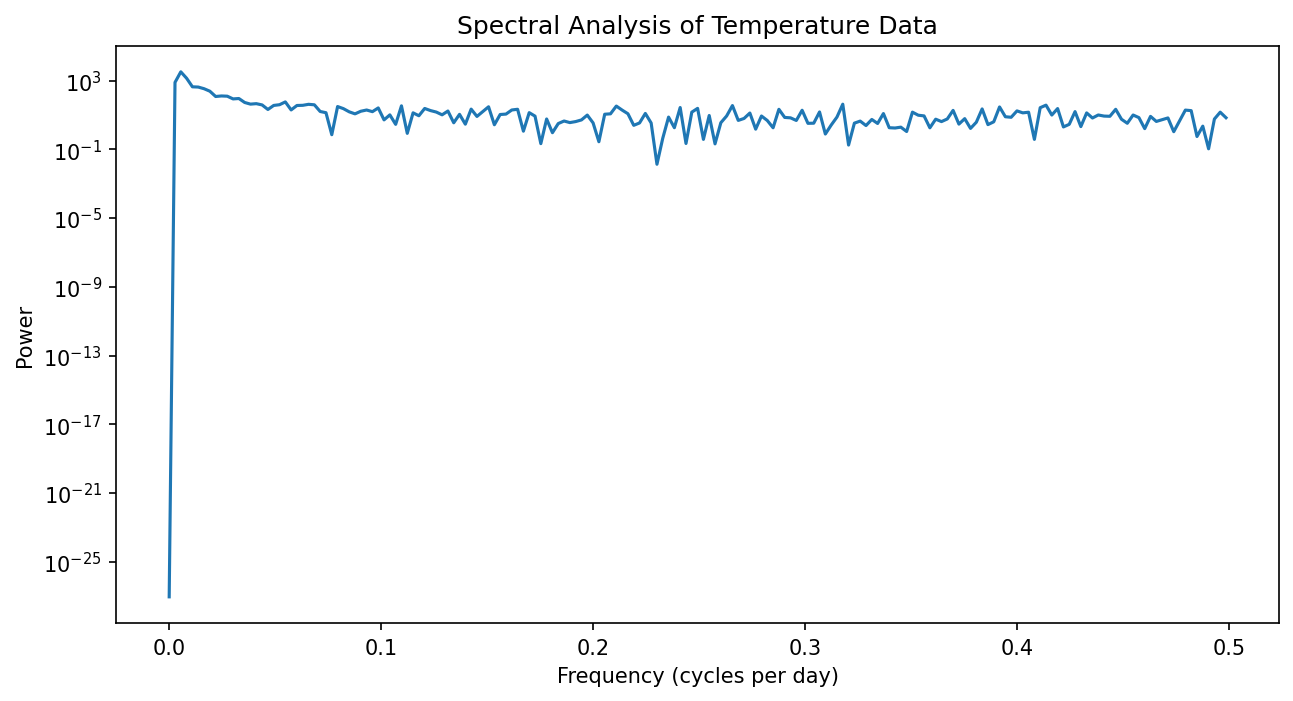

In [19]:
from scipy.signal import periodogram

frequencies, power = periodogram(temperature_data, fs=1)

plt.figure(figsize=(10, 5),dpi=150)
plt.semilogy(frequencies, power)
plt.title("Spectral Analysis of Temperature Data")
plt.xlabel("Frequency (cycles per day)")
plt.ylabel("Power")
plt.show()


## Using Autocorrelation to Understand Data Dependencies

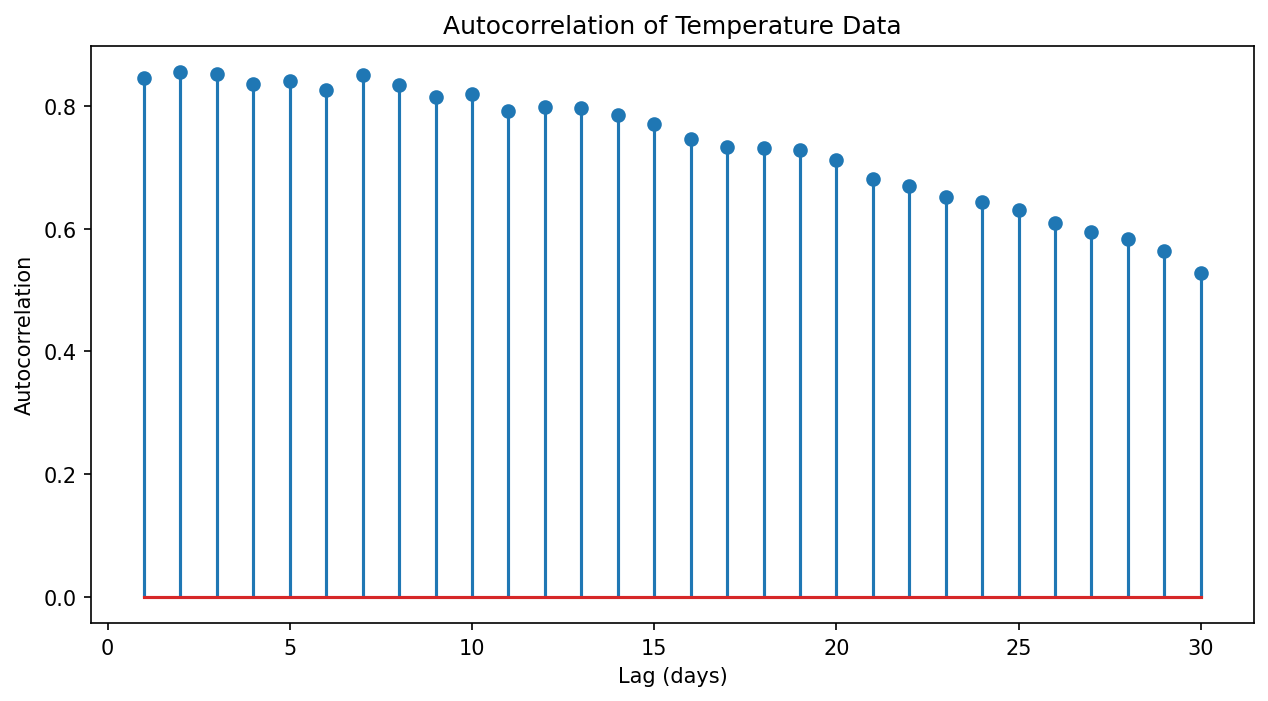

In [20]:
from scipy.stats import pearsonr

lags = range(1, 31)
autocorrs = [pearsonr(temperature_data[:-lag], temperature_data[lag:])[0] for lag in lags]

plt.figure(figsize=(10, 5),dpi=150)
plt.stem(lags, autocorrs)
plt.title("Autocorrelation of Temperature Data")
plt.xlabel("Lag (days)")
plt.ylabel("Autocorrelation")
plt.show()


## Cross-Correlation for Relationships Between Series


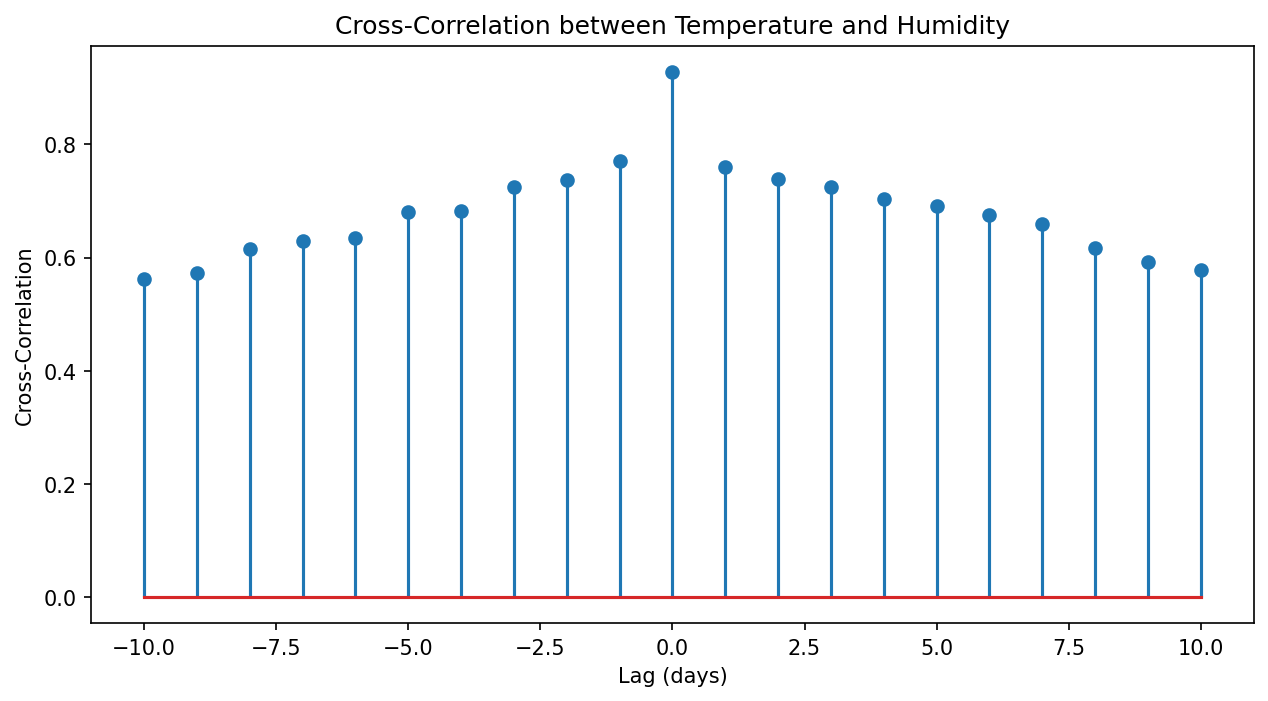

In [21]:
# Generate synthetic humidity data with a lagged relationship to temperature
humidity_data = 70 + 0.5 * temperature_data[:-5] + np.random.normal(0, 1, 360)

# Calculate cross-correlation
cross_corrs = [pearsonr(temperature_data[:360], np.roll(humidity_data, shift))[0] for shift in range(-10, 11)]

# Plot cross-correlation
plt.figure(figsize=(10, 5),dpi=150)
plt.stem(range(-10, 11), cross_corrs)
plt.title("Cross-Correlation between Temperature and Humidity")
plt.xlabel("Lag (days)")
plt.ylabel("Cross-Correlation")
plt.show()
